

В этом домашнем задании  стоит задача научиться по фотографии лица человека предсказывать его пол, расу и возраст.

[Датасет](https://susanqq.github.io/UTKFace/), который мы будем использовать состоит из 20000 фотографий лиц людей в возрасте от 0 до 116 лет! В качестве разметки имеется пол (male/female), раса (white/black/asian/indian/other) и возраст. Классификация с настолько сильной внутриклассовой изменьчивостью
![alt text](https://susanqq.github.io/UTKFace/icon/samples.png)


## Загрузка обученной модели

Сеть, которую мы будем дообучать мы возьмем из открытого источника: https://github.com/rcmalli/keras-vggface .

In [1]:
! pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to c:\users\vahahat\appdata\local\temp\pip-req-build-na6_737y
  Resolved https://github.com/rcmalli/keras-vggface.git to commit 719ad75625fe51436b9a9479114b3d136847e11a
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8384 sha256=9dce12c559c98669328b9231913cfa28ba12f4bc3a4f37ddc33b65f71d764d15
  Stored in directory: C:\Users\vahahat\AppData\Local\Temp\pip-ephem-wheel-cache-e5_6z3w6\wheels\62\cd\e0\3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface


  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git 'C:\Users\vahahat\AppData\Local\Temp\pip-req-build-na6_737y'


In [2]:
import tensorflow as tf
#tf.enable_eager_execution()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tf.config.list_physical_devices('gpu')
from tensorflow.python.client import device_lib
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices()) 

['/device:CPU:0', '/device:GPU:0']


In [5]:
! pip install gdown
!pip install keras_applications
import gdown

url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO'
output = 'resnet50face.h5'
gdown.download(url, output, quiet=False)

  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)


Downloading...
From (uriginal): https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
From (redirected): https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO&confirm=t&uuid=1ea401ed-8616-46b7-807d-b5dad6b467f2
To: C:\Users\vahahat\Downloads\resnet50face.h5
100%|███████████████████████████████████████████████████████████████████████████████| 166M/166M [00:11<00:00, 15.0MB/s]


'resnet50face.h5'

In [6]:
from tensorflow.keras.models import load_model
vggface_model = load_model("resnet50face.h5")

Модель загружена, а теперь посмотрим, что она из себя представляет. Это архитектура -- ResNet. На самом деле внутренности модели не очень важны для нас -- в дальнейшем мы заморозим бОльшую часть этой сети и будем рабоать только с последними слоями. Нам важно, что она обучена и мы имеем доступ к ее архитектуре и весам.

In [7]:
vggface_model.summary() # последний слой классифицирует на 8631 классов

Model: "vggface_resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                  

                                                                                                  
 conv2_3_1x1_increase (Conv2D)  (None, 55, 55, 256)  16384       ['activation_9[0][0]']           
                                                                                                  
 conv2_3_1x1_increase/bn (Batch  (None, 55, 55, 256)  1024       ['conv2_3_1x1_increase[0][0]']   
 Normalization)                                                                                   
                                                                                                  
 add_3 (Add)                    (None, 55, 55, 256)  0           ['conv2_3_1x1_increase/bn[0][0]',
                                                                  'activation_7[0][0]']           
                                                                                                  
 activation_10 (Activation)     (None, 55, 55, 256)  0           ['add_3[0][0]']                  
          

 add_6 (Add)                    (None, 28, 28, 512)  0           ['conv3_3_1x1_increase/bn[0][0]',
                                                                  'activation_16[0][0]']          
                                                                                                  
 activation_19 (Activation)     (None, 28, 28, 512)  0           ['add_6[0][0]']                  
                                                                                                  
 conv3_4_1x1_reduce (Conv2D)    (None, 28, 28, 128)  65536       ['activation_19[0][0]']          
                                                                                                  
 conv3_4_1x1_reduce/bn (BatchNo  (None, 28, 28, 128)  512        ['conv3_4_1x1_reduce[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 activatio

                                                                                                  
 activation_28 (Activation)     (None, 14, 14, 1024  0           ['add_9[0][0]']                  
                                )                                                                 
                                                                                                  
 conv4_3_1x1_reduce (Conv2D)    (None, 14, 14, 256)  262144      ['activation_28[0][0]']          
                                                                                                  
 conv4_3_1x1_reduce/bn (BatchNo  (None, 14, 14, 256)  1024       ['conv4_3_1x1_reduce[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 activation_29 (Activation)     (None, 14, 14, 256)  0           ['conv4_3_1x1_reduce/bn[0][0]']  
          

                                                                                                  
 conv4_6_1x1_reduce/bn (BatchNo  (None, 14, 14, 256)  1024       ['conv4_6_1x1_reduce[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 activation_38 (Activation)     (None, 14, 14, 256)  0           ['conv4_6_1x1_reduce/bn[0][0]']  
                                                                                                  
 conv4_6_3x3 (Conv2D)           (None, 14, 14, 256)  589824      ['activation_38[0][0]']          
                                                                                                  
 conv4_6_3x3/bn (BatchNormaliza  (None, 14, 14, 256)  1024       ['conv4_6_3x3[0][0]']            
 tion)                                                                                            
          

 activation_47 (Activation)     (None, 7, 7, 512)    0           ['conv5_3_1x1_reduce/bn[0][0]']  
                                                                                                  
 conv5_3_3x3 (Conv2D)           (None, 7, 7, 512)    2359296     ['activation_47[0][0]']          
                                                                                                  
 conv5_3_3x3/bn (BatchNormaliza  (None, 7, 7, 512)   2048        ['conv5_3_3x3[0][0]']            
 tion)                                                                                            
                                                                                                  
 activation_48 (Activation)     (None, 7, 7, 512)    0           ['conv5_3_3x3/bn[0][0]']         
                                                                                                  
 conv5_3_1x1_increase (Conv2D)  (None, 7, 7, 2048)   1048576     ['activation_48[0][0]']          
          

Для проверки того, что помимо архитектуры мы правильно загрузили веса, проверим предсказания модели на следующем изображении: 

In [8]:
import requests
url = 'https://img.joinfo.ua/i/2019/01/5c4ea940d2b08.jpg'
r = requests.get(url)
open('brad_pitt.jpg' , 'wb').write(r.content)

43154

После загрузки запустим полный пример из репозитория:

1/1 [==============================] - 5s 5s/step


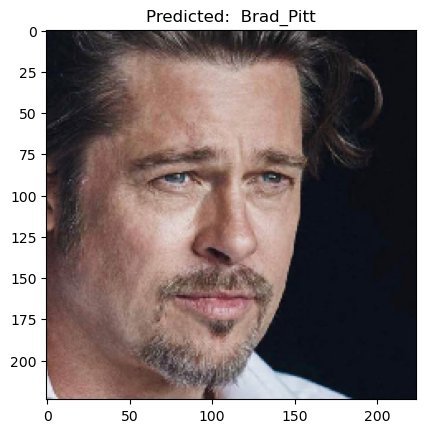

In [9]:
from keras.utils.data_utils import get_file
from tensorflow.keras.preprocessing import image
V2_LABELS_PATH = 'https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_labels_v2.npy'


VGGFACE_DIR = 'models/vggface'
fpath = get_file('rcmalli_vggface_labels_v2.npy',
                             V2_LABELS_PATH,
                             cache_subdir=VGGFACE_DIR)
LABELS = np.load(fpath)

img = image.load_img("brad_pitt.jpg", target_size=(224, 224))
img = image.load_img("brad_pitt.jpg", target_size=(224, 224)) # модель работает с картинками размера 224 на 224
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# x = utils.preprocess_input(x, version=2) # мы используем resnet50 -- поэтому version2. Эта функция нам еще пригодится!

preds = vggface_model.predict(x) # модель -- известная нам keras model, вызываем predict
plt.title(f"Predicted: {LABELS[np.argmax(preds)]}")  # используем  decode_predictions из keras_vggface
plt.imshow(img)

## Загрузка данных
Мы убедились, что модель загружена правильно, узнали какой препроцессинг ей необходим (utils.preprocess_input(x, version=2)) и теперь можем перейти к загрузке наших данных.

In [10]:
from pathlib import Path
from collections import Counter
import gdown
import os

In [11]:
cur = os.curdir
if not os.path.exists(cur + '//'+ 'tmp'):
    os.makedirs(cur + '//'+ 'tmp')
cur

'.'

In [12]:

url = 'https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk'
output = cur + '/tmp/UTKFace.tar.gz'
gdown.download(url, output, quiet=False)
from subprocess import call
call(['tar', '-xzf', cur + '/tmp/UTKFace.tar.gz', '-C',cur +  '/tmp/'])
url = 'https://drive.google.com/uc?id=1mux7xiP4NP6AUUFvUW42RgSdUEQ4k5e2'
output = 'train_val_split_utk.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk
From (redirected): https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk&confirm=t&uuid=122669c8-b252-495a-93a2-f8332f171a96
To: C:\Users\vahahat\Downloads\tmp\UTKFace.tar.gz
100%|███████████████████████████████████████████████████████████████████████████████| 107M/107M [00:08<00:00, 12.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mux7xiP4NP6AUUFvUW42RgSdUEQ4k5e2
To: C:\Users\vahahat\Downloads\train_val_split_utk.csv
100%|█████████████████████████████████████████████████████████████████████████████| 1.08M/1.08M [00:00<00:00, 4.17MB/s]


'train_val_split_utk.csv'

In [13]:
data_folder = Path("./tmp/UTKFace")
filenames = list(map(lambda x: x.name, data_folder.glob('*.jpg')))
print(len(filenames))
print(filenames[:3]) # имя файла содержит возраст, индекс пола и расы, перечисленные через нижнее подчеркивание

23708
['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']


In [14]:
# формируем датафрейм с путями и нужными классами
np.random.seed(10)
np.random.shuffle(filenames)
gender_mapping = {0: 'Male', 1: 'Female'}
race_mapping = dict(list(enumerate(('White', 'Black', 'Asian', 'Indian', 'Others'))))
age_labels, gender_labels, race_labels, correct_filenames = [], [], [], []

for filename in filenames:
    if len(filename.split('_')) != 4:
        print(f"Bad filename {filename}")
        continue

    age, gender, race, _ = filename.split('_')
    correct_filenames.append(filename)
    age_labels.append(age)
    gender_labels.append(gender)
    race_labels.append(race)
    
age_labels = np.array(age_labels, dtype=np.float32)
max_age = age_labels.max()
data = {"img_name": correct_filenames, 
        "age": age_labels / max_age, # нормализуем возраст от 0 до 1
        "race": race_labels, 
        "gender": gender_labels}
df = pd.DataFrame(data)
df.head()

Bad filename 61_1_20170109150557335.jpg.chip.jpg
Bad filename 61_1_20170109142408075.jpg.chip.jpg
Bad filename 39_1_20170116174525125.jpg.chip.jpg


,img_name,age,race,gender
0,23_1_2_20170116172910708.jpg.chip.jpg,0.198276,2,1
1,28_0_1_20170113150719161.jpg.chip.jpg,0.241379,1,0
2,26_1_0_20170116234741431.jpg.chip.jpg,0.224138,0,1
3,37_0_3_20170119202516470.jpg.chip.jpg,0.318966,3,0
4,60_0_0_20170109013457906.jpg.chip.jpg,0.517241,0,0


In [15]:
df_split = pd.read_csv("train_val_split_utk.csv", index_col=0).set_index("img_name")
df_split.head()
df = df.set_index("img_name").join(df_split).reset_index()
df_train = df[df["is_train"] == 1]
df_val = df[df["is_train"] != 1]
print(len(df_val), len(df_train))

4759 18946


In [16]:
def decode_labels(race_id, gender_id, age):
    return race_mapping[int(race_id)], gender_mapping[int(gender_id)], int(age*max_age)
def show_face(image, race_id, gender_id, age):
    plt.imshow(image)
    race, gender, age = decode_labels(race_id, gender_id, age)
    plt.title(f"Gender: {gender}, Race: {race}, Age: {age}")

Убедимся, что метки классов корректны:

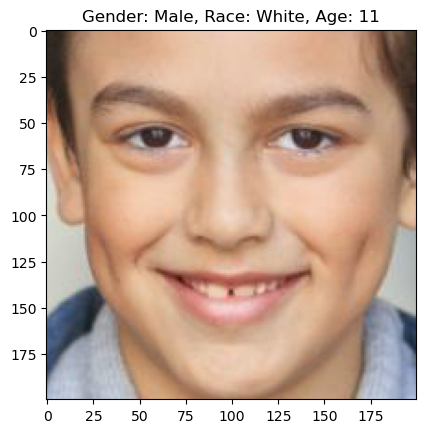

In [17]:
row = df.iloc[np.random.randint(len(df))]
img = plt.imread(str(data_folder / row["img_name"]))
show_face(img, row["race"], row["gender"], row["age"])

Посмотрим на их распределение:

Counter({'White': 10078, 'Black': 4526, 'Indian': 3975, 'Asian': 3434, 'Others': 1692})
Counter({'Male': 12391, 'Female': 11314})


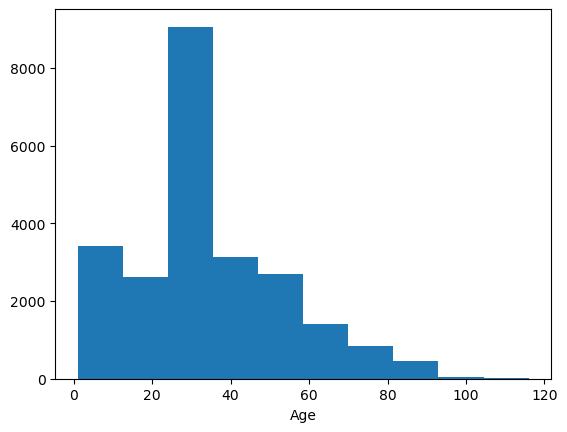

In [18]:
races_verbose = [race_mapping[int(race)] for race in df["race"]]
genders_verbose = [gender_mapping[int(gender)] for gender in df["gender"]]
from collections import Counter
print(Counter(races_verbose))
print(Counter(genders_verbose))
_ = plt.hist(df["age"]*max_age)
_ = plt.xlabel("Age")

##  Создание генератора данных для модели предсказания пола.

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_input_facenet(image_):
    """
    image_ -- тензор размера (1, H, W, 3)
    
    return: картинка, с примененным preprocess_input(..., version=2) из keras_vggface (см пример с Бредом Питом)
    """
   
    from keras_vggface.utils import preprocess_input
    preprocessed = preprocess_input(image_, version=2)
    

    return preprocessed



image_gen = ImageDataGenerator(preprocessing_function = preprocess_input_facenet)



1/1 [==============================] - 0s 21ms/step


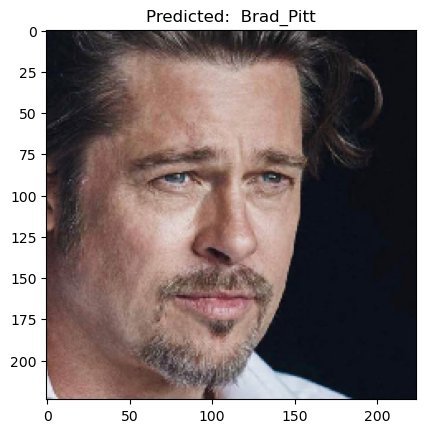

In [20]:
VGGFACE_DIR = 'models/vggface'
fpath = get_file('rcmalli_vggface_labels_v2.npy',
                             V2_LABELS_PATH,
                             cache_subdir=VGGFACE_DIR)
LABELS = np.load(fpath)

img = image.load_img("brad_pitt.jpg", target_size=(224, 224))
img = image.load_img("brad_pitt.jpg", target_size=(224, 224)) # модель работает с картинками размера 224 на 224
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# x = utils.preprocess_input(x, version=2) # мы используем resnet50 -- поэтому version2. Эта функция нам еще пригодится!

preds = vggface_model.predict(x) # модель -- известная нам keras model, вызываем predict
plt.title(f"Predicted: {LABELS[np.argmax(preds)]}")  # используем  decode_predictions из keras_vggface
plt.imshow(img)

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.layer_utils import get_source_inputs
BATCH_SIZE = 128
IMAGE_SIZE = 224
# < YOUR CODE STARTS HERE >
# train_generator = image_gen.flow_from_dataframe( ... ), 
# val_generator = image_gen.flow_from_dataframe( ... )

train_generator = image_gen.flow_from_dataframe( directory=str(r'./tmp/UTKFace'),
                                                dataframe=df,
                                                batch_size=BATCH_SIZE,
                                                x_col = 'img_name',
                                                y_col = 'gender',
                                                shuffle=True,
                                                target_size=[IMAGE_SIZE,IMAGE_SIZE],
                                                class_mode =  "binary")




val_generator = image_gen.flow_from_dataframe( directory=str(r'./tmp/UTKFace'),
                                                x_col = 'img_name',
                                                y_col = 'gender',
                                                batch_size=BATCH_SIZE,
                                                shuffle=False,
                                                dataframe=df,
                                                target_size=[IMAGE_SIZE,IMAGE_SIZE],
                                                class_mode =  "binary")





# < YOUR CODE ENDS HERE >

Found 23705 validated image filenames belonging to 2 classes.
Found 23705 validated image filenames belonging to 2 classes.


In [51]:
sample_images, sample_labels = next(val_generator)
assert sample_images.shape == (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3), "Неправильный размер батча"
assert sample_labels.shape == (BATCH_SIZE,), "Неправильный размер меток класса"
assert list(sorted(np.unique(sample_labels))) == [0., 1.], "Ожидаемые классы 0 и 1"
print("Simple tests passed")

Simple tests passed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Male


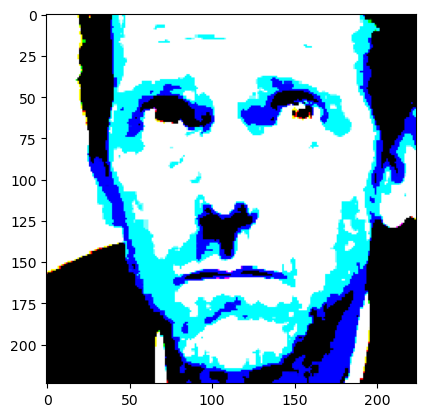

In [52]:
plt.imshow(sample_images[100])
print(gender_mapping[int(sample_labels[100])])
# мы получим очень странное изображение и это нормально. 
# matplotlib ожидает картинку с интесивностями от 0 до 1 если она типа float и от 0 до 255 если int.

In [53]:
print(sample_images[100].max(), sample_images[100].min()) # можно увидеть что значения яркостей типа float и в т.ч. отрицательные

157.5047 -131.0912


Male


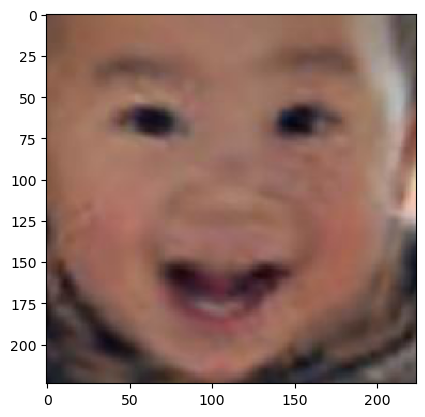

In [54]:

def deprocess_image(vggface_image):
    image = np.copy(vggface_image)
    image[..., 0] += 91.4953
    image[..., 1] += 103.8827
    image[..., 2] += 131.0912
    image = image[..., ::-1].astype(np.uint8)    

    return image

plt.imshow(deprocess_image(sample_images[5]))
print(gender_mapping[int(sample_labels[5])])

## Обучение модели предсказания пола


In [2]:
# # для начала "отрежем" от vggface_model последний слой классификатора 
# # теперь для картинки base_model предсказывает 2048-мерный вектор признаков.

base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.summary()

In [56]:
!pip install livelossplot
!pip install keras_applications

from livelossplot import PlotLossesKeras

В этом задании вы должны обучить модель предсказания пола с точностью более 90% на валидационном сете.

Возьмите за основу 'base_model' (определена ниже)
Вы должны сами решить сколько слоев замораживать и сколько полносвзяных слоев использовать. Рекомендуем начинать с модели с меньшим числом обучаемых параметров.
Используйте чекпоинты, чтобы не потерять веса лучшей модели. Они должны быть сохранены с именем "model_gender/checkpoint_best.h5"
Рекомендуется в model.fit(...) использовать steps_per_epoch=25, для того чтобы проверка на валидации происходила чаще и вы могли более точно отслеживать прогресс. Полная эпоха ~140 итераций.
За точность выше 94% -- дополнительные баллы.

In [58]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [59]:
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 2048)              23561152  
                                                                 
 dense_3 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,563,201
Trainable params: 19,435,521
Non-trainable params: 4,127,680
_________________________________________________________________


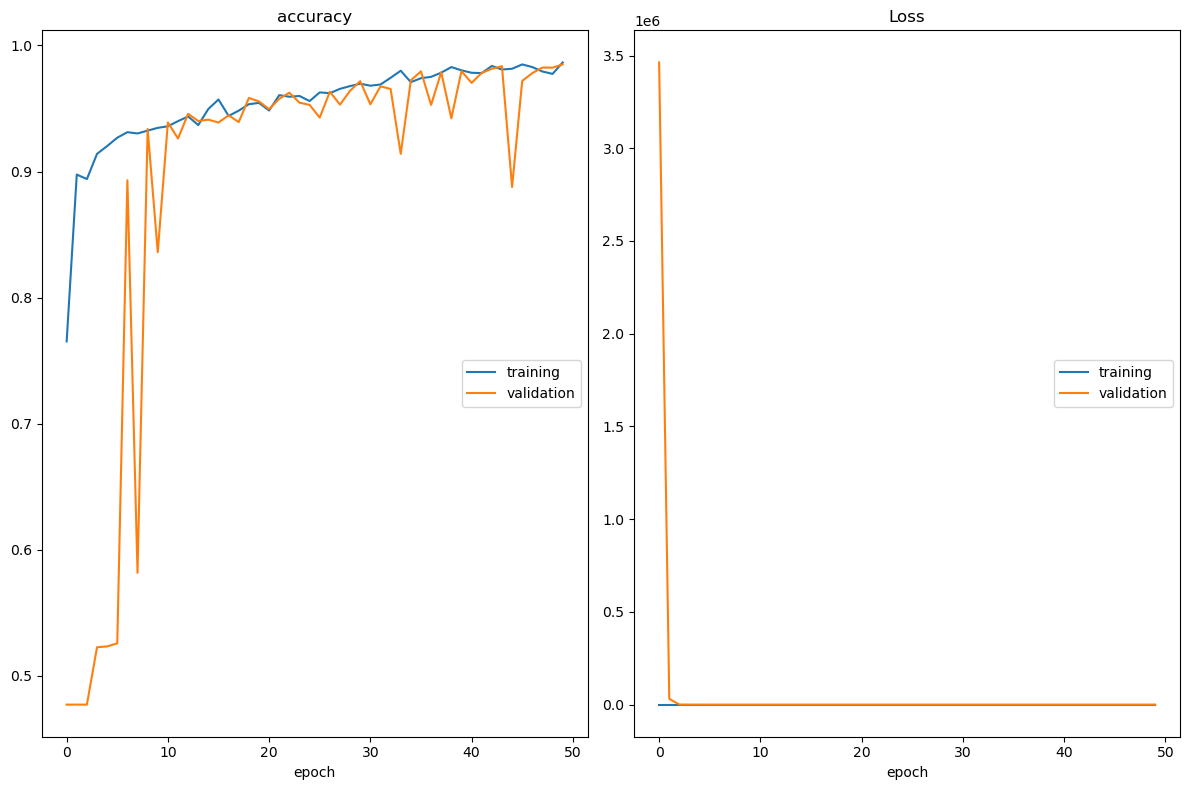

accuracy
	training         	 (min:    0.765, max:    0.987, cur:    0.987)
	validation       	 (min:    0.477, max:    0.985, cur:    0.985)
Loss
	training         	 (min:    0.041, max:    0.625, cur:    0.048)
	validation       	 (min:    0.047, max: 3462740.500, cur:    0.047)
25/25 [==============================] - 35s 1s/step - loss: 0.0477 - accuracy: 0.9866 - val_loss: 0.0469 - val_accuracy: 0.9850


In [60]:
EPOCHS = 50
checkpoint_path = cur+'//'+'content/cp'
tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=False,
                                                         save_best_only = True,
                                                         verbose=1)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=25,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[PlotLossesKeras()])

In [61]:
tf.config.list_physical_devices('gpu')

[]

In [62]:
model.save(cur + '//' + 'model_gender/checkpoint_best.h5')

In [64]:
model_gender = load_model(cur + '//' + "model_gender/checkpoint_best.h5")
loss, acc = model_gender.evaluate(val_generator)
if acc < 0.9:
    print("Please, try harder!")
else:
    if acc >= 0.94:
        print("Well done!")
    else:
        print("Very good! Can you improve accuracy?")

186/186 [==============================] - 29s 152ms/step - loss: 0.0469 - accuracy: 0.9850
Well done!


In [65]:
#@title (вспомогательный код, выполните клетку)
def show_faces(images, real_race=None, real_gender=None, real_age=None, 
               predicted_race=None, predicted_gender=None, predicted_age=None):
    plt.figure(figsize=(10,10))
    labels = {"Gender": [predicted_gender, real_gender],
                  "Race": [predicted_race, real_race],
                  "Age": [predicted_age, real_age]}
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(deprocess_image(images[i]))
        real_str = "Real:"
        pred_str = "Pred:"
        correct = True
        for name, (predicted, real) in labels.items():
            if predicted is None:
                continue
            if name == "Age":
                real_age = int(real[i]*int(max_age))
                predicted_age = int(predicted[i]*max_age)
                real_str += f"{real_age}"
                pred_str += f"{predicted_age}"
                if np.abs(predicted_age - real_age) > 6:
                    correct = False

            elif name == "Gender":
                real_gender = int(real[i])
                predicted_gender = int(predicted[i] > 0.5)
                real_str += f"{gender_mapping[real_gender]}, "
                pred_str += f"{gender_mapping[predicted_gender]}, "
                if real_gender != predicted_gender:
                    correct = False
            elif name == "Race":
                real_race = int(real[i])
                predicted_race = np.argmax(predicted[i])
                real_str += f"{race_mapping[real_race]}, "
                pred_str += f"{race_mapping[predicted_race]}, "
                if real_race != predicted_race:
                    correct = False
                
        title_obj = plt.title(f"{real_str}\n{pred_str}")
            
        plt.subplots_adjust(wspace=0.4)
        if not correct:
            plt.setp(title_obj, color='r')
        

4/4 [==============================] - 1s 36ms/step


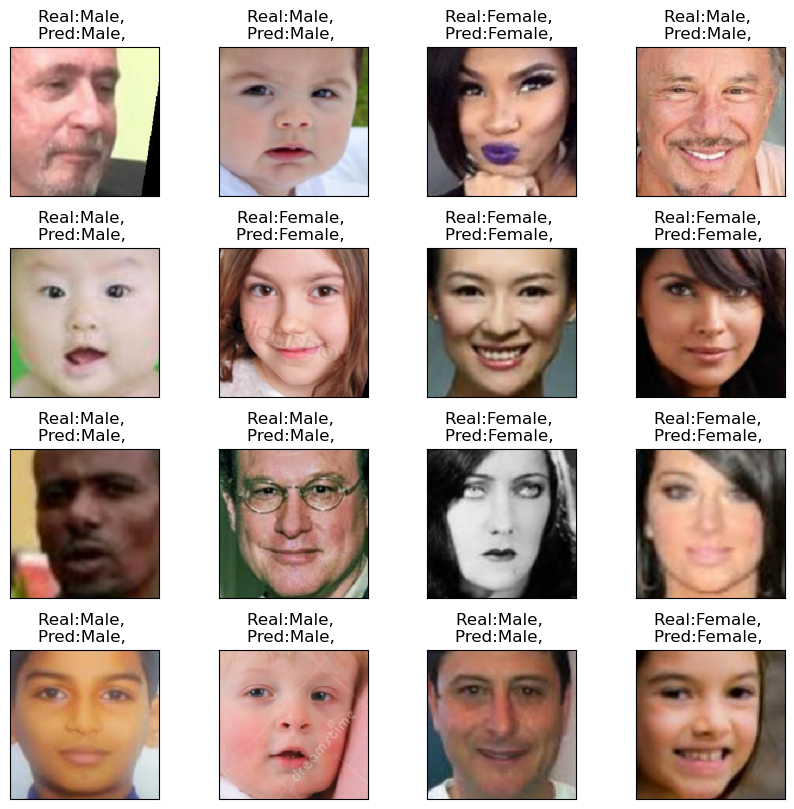

In [66]:
sample_validation_images, sample_validation_labels = next(val_generator)
predicted = model_gender.predict(sample_validation_images)
show_faces(sample_validation_images, real_gender=sample_validation_labels, predicted_gender=predicted)

## Обучение модели предсказания расы



In [67]:
vggface_model = load_model("resnet50face.h5")
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = False

In [68]:

BATCH_SIZE = 128
IMAGE_SIZE = 224
# train_generator = image_gen.flow_from_dataframe( ... ), 
# val_generator = image_gen.flow_from_dataframe( ... )

train_generator = image_gen.flow_from_dataframe( directory=str(r'./tmp/UTKFace'),
                                                dataframe=df,
                                                batch_size=BATCH_SIZE,
                                                x_col = 'img_name',
                                                y_col = 'race',
                                                shuffle=True,
                                                target_size=[IMAGE_SIZE,IMAGE_SIZE],
                                                class_mode =  "sparse")




val_generator = image_gen.flow_from_dataframe( directory=str(r'./tmp/UTKFace'),
                                                x_col = 'img_name',
                                                y_col = 'race',
                                                batch_size=BATCH_SIZE,
                                                shuffle=False,
                                                dataframe=df,
                                                target_size=[IMAGE_SIZE,IMAGE_SIZE],
                                                class_mode =  "sparse")




Found 23705 validated image filenames belonging to 5 classes.
Found 23705 validated image filenames belonging to 5 classes.


In [69]:
# Обучение модели предсказания расы
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3 (Functional)        (None, 2048)              23561152  
                                                                 
 dense_4 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,571,397
Trainable params: 10,245
Non-trainable params: 23,561,152
_________________________________________________________________


In [70]:
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3 (Functional)        (None, 2048)              23561152  
                                                                 
 dense_4 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,571,397
Trainable params: 19,443,717
Non-trainable params: 4,127,680
_________________________________________________________________


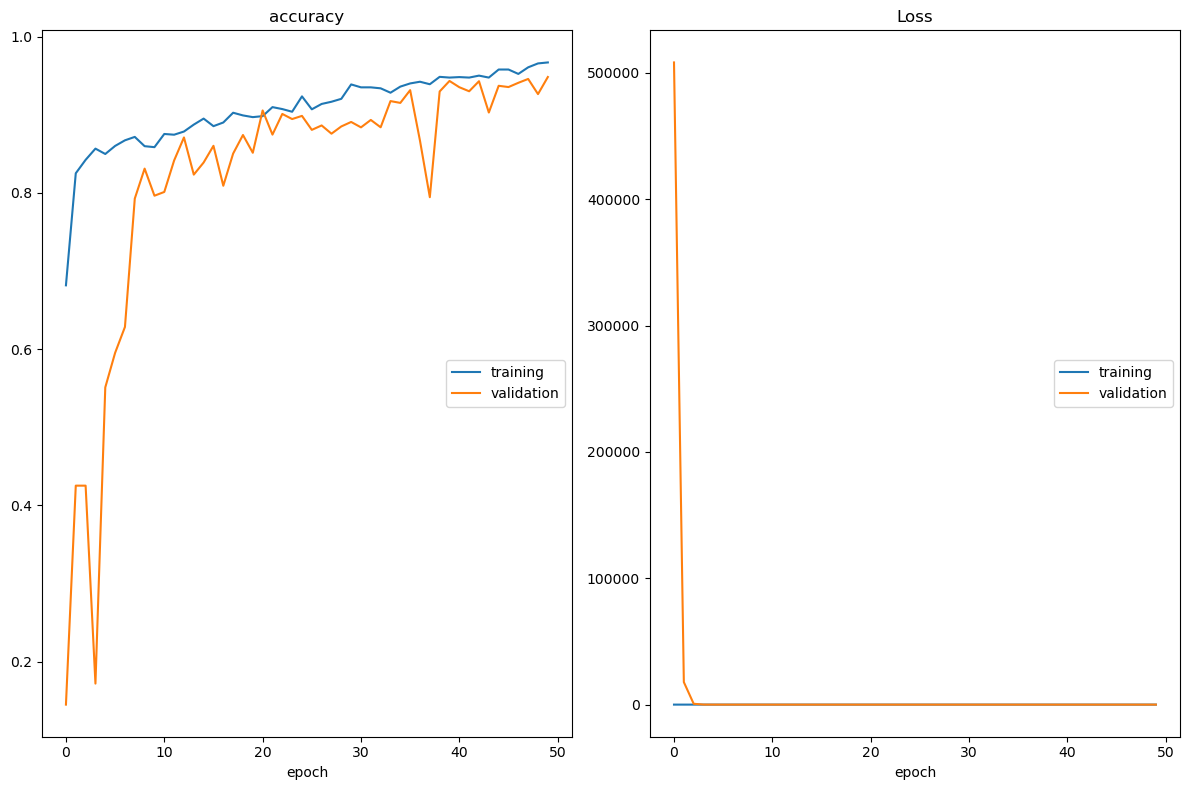

accuracy
	training         	 (min:    0.682, max:    0.967, cur:    0.967)
	validation       	 (min:    0.145, max:    0.948, cur:    0.948)
Loss
	training         	 (min:    0.110, max:    1.735, cur:    0.112)
	validation       	 (min:    0.157, max: 508220.125, cur:    0.157)
25/25 [==============================] - 35s 1s/step - loss: 0.1121 - accuracy: 0.9669 - val_loss: 0.1565 - val_accuracy: 0.9482


In [71]:
EPOCHS = 50
history = model.fit_generator(
    train_generator,
    steps_per_epoch=25,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[PlotLossesKeras()])

In [74]:
model.save(cur + '//' + 'model_race/checkpoint_best.h5')

In [76]:
model_race = load_model("./model_race/checkpoint_best.h5")
loss, acc = model_race.evaluate(val_generator)
if acc < 0.8:
    print("Please, try harder!")
else:
    if acc >= 0.85:
        print("Well done!")
    else:
        print("Very good! Can you improve accuracy?")

186/186 [==============================] - 66s 351ms/step - loss: 0.1565 - accuracy: 0.9482
Well done!


4/4 [==============================] - 1s 39ms/step


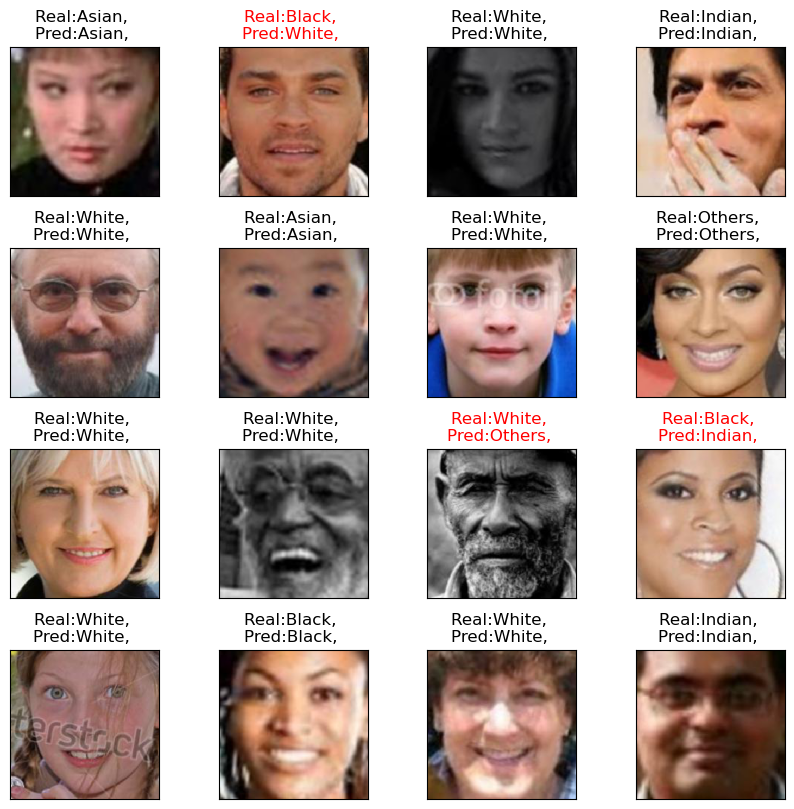

In [77]:
sample_validation_images, sample_validation_labels = next(val_generator)
predicted = model_race.predict(sample_validation_images)
show_faces(sample_validation_images, real_race=sample_validation_labels, predicted_race=predicted)

## Multitask learning


Модель сети с тремя "головами".**

In [78]:
vggface_model = load_model("resnet50face.h5")
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = False

In [127]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, concatenate

input_layer = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))



# Добавляем слои для первого выхода
gender_output = Dense(5, activation='relu')(base_model.get_layer('flatten_1').output)
gender_output = Dense(1, activation='linear', name='gender')(gender_output)

# Добавляем слои для второго выхода
race_output = Dense(50, activation='relu')(base_model.get_layer('flatten_1').output)
race_output = Dense(5, activation='softmax', name='race')(race_output)

# Добавляем слои для третьего выхода
age_output = Dense(10, activation='relu')(base_model.get_layer('flatten_1').output)
age_output = Dense(1, activation='sigmoid', name='age')(age_output)

# Объединяем выходы в одну модель
model = tf.keras.Model(inputs=base_model.input, outputs=[gender_output, race_output, age_output])

model.summary()
plot_model(model)


Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                          

                                                                                                  
 conv2_3_1x1_increase (Conv2D)  (None, 55, 55, 256)  16384       ['activation_9[0][0]']           
                                                                                                  
 conv2_3_1x1_increase/bn (Batch  (None, 55, 55, 256)  1024       ['conv2_3_1x1_increase[0][0]']   
 Normalization)                                                                                   
                                                                                                  
 add_3 (Add)                    (None, 55, 55, 256)  0           ['conv2_3_1x1_increase/bn[0][0]',
                                                                  'activation_7[0][0]']           
                                                                                                  
 activation_10 (Activation)     (None, 55, 55, 256)  0           ['add_3[0][0]']                  
          

 add_6 (Add)                    (None, 28, 28, 512)  0           ['conv3_3_1x1_increase/bn[0][0]',
                                                                  'activation_16[0][0]']          
                                                                                                  
 activation_19 (Activation)     (None, 28, 28, 512)  0           ['add_6[0][0]']                  
                                                                                                  
 conv3_4_1x1_reduce (Conv2D)    (None, 28, 28, 128)  65536       ['activation_19[0][0]']          
                                                                                                  
 conv3_4_1x1_reduce/bn (BatchNo  (None, 28, 28, 128)  512        ['conv3_4_1x1_reduce[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 activatio

                                                                                                  
 activation_28 (Activation)     (None, 14, 14, 1024  0           ['add_9[0][0]']                  
                                )                                                                 
                                                                                                  
 conv4_3_1x1_reduce (Conv2D)    (None, 14, 14, 256)  262144      ['activation_28[0][0]']          
                                                                                                  
 conv4_3_1x1_reduce/bn (BatchNo  (None, 14, 14, 256)  1024       ['conv4_3_1x1_reduce[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 activation_29 (Activation)     (None, 14, 14, 256)  0           ['conv4_3_1x1_reduce/bn[0][0]']  
          

                                                                                                  
 conv4_6_1x1_reduce/bn (BatchNo  (None, 14, 14, 256)  1024       ['conv4_6_1x1_reduce[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 activation_38 (Activation)     (None, 14, 14, 256)  0           ['conv4_6_1x1_reduce/bn[0][0]']  
                                                                                                  
 conv4_6_3x3 (Conv2D)           (None, 14, 14, 256)  589824      ['activation_38[0][0]']          
                                                                                                  
 conv4_6_3x3/bn (BatchNormaliza  (None, 14, 14, 256)  1024       ['conv4_6_3x3[0][0]']            
 tion)                                                                                            
          

 activation_47 (Activation)     (None, 7, 7, 512)    0           ['conv5_3_1x1_reduce/bn[0][0]']  
                                                                                                  
 conv5_3_3x3 (Conv2D)           (None, 7, 7, 512)    2359296     ['activation_47[0][0]']          
                                                                                                  
 conv5_3_3x3/bn (BatchNormaliza  (None, 7, 7, 512)   2048        ['conv5_3_3x3[0][0]']            
 tion)                                                                                            
                                                                                                  
 activation_48 (Activation)     (None, 7, 7, 512)    0           ['conv5_3_3x3/bn[0][0]']         
                                                                                                  
 conv5_3_1x1_increase (Conv2D)  (None, 7, 7, 2048)   1048576     ['activation_48[0][0]']          
          

In [123]:
prediction = model(np.zeros((6, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32))
assert len(prediction) == 3, "Модель должна возвращать три тензора"
assert prediction[0].shape == (6, 1), f"Неправильный размер выхода gender: {prediction[0].shape}"
assert prediction[1].shape == (6, 5), f"Неправильный размер выхода race: {prediction[1].shape}"
assert prediction[2].shape == (6, 1), f"Неправильный размер выхода age: {prediction[2].shape}"
print("tests passed")

Shape tests passed


In [128]:
train_generator = image_gen.flow_from_dataframe(
        dataframe=df_train,
        class_mode="raw",
        x_col="img_name", y_col=["gender", "race", "age"], # нас интересуют все три столбца
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
val_generator = image_gen.flow_from_dataframe(
        dataframe=df_val,
        class_mode="raw",
        x_col="img_name", y_col=["gender", "race", "age"], 
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
def split_outputs(generator):
    """
    Вспомогательная функция, которая модернизирует генераторы картинок, чтобы их
    можно было использовать для Мultitask
    image_gen.flow_from_dataframe возвращает на каждой итерации батч:
    ((N, H, W, 3), (N, 3)) -- N картинок и N троек меток (для трех "задач")
    model.fit(..) ожидает генератор в формате:
    ((N, H, W, 3), [(N, 1), (N, 1), (N, 1)])

    """
    while True:
        data = next(generator)
        image = data[0]
        labels = np.split(data[1].astype('float32'), 3, axis=1)
        labels = [labels[0].reshape((len(labels[0]),)),
                  labels[1].reshape((len(labels[1]),)),
                  labels[2].reshape((len(labels[2]),))]
        yield image, labels

Found 18946 validated image filenames.
Found 4759 validated image filenames.


А теперь перейдем к обучению:

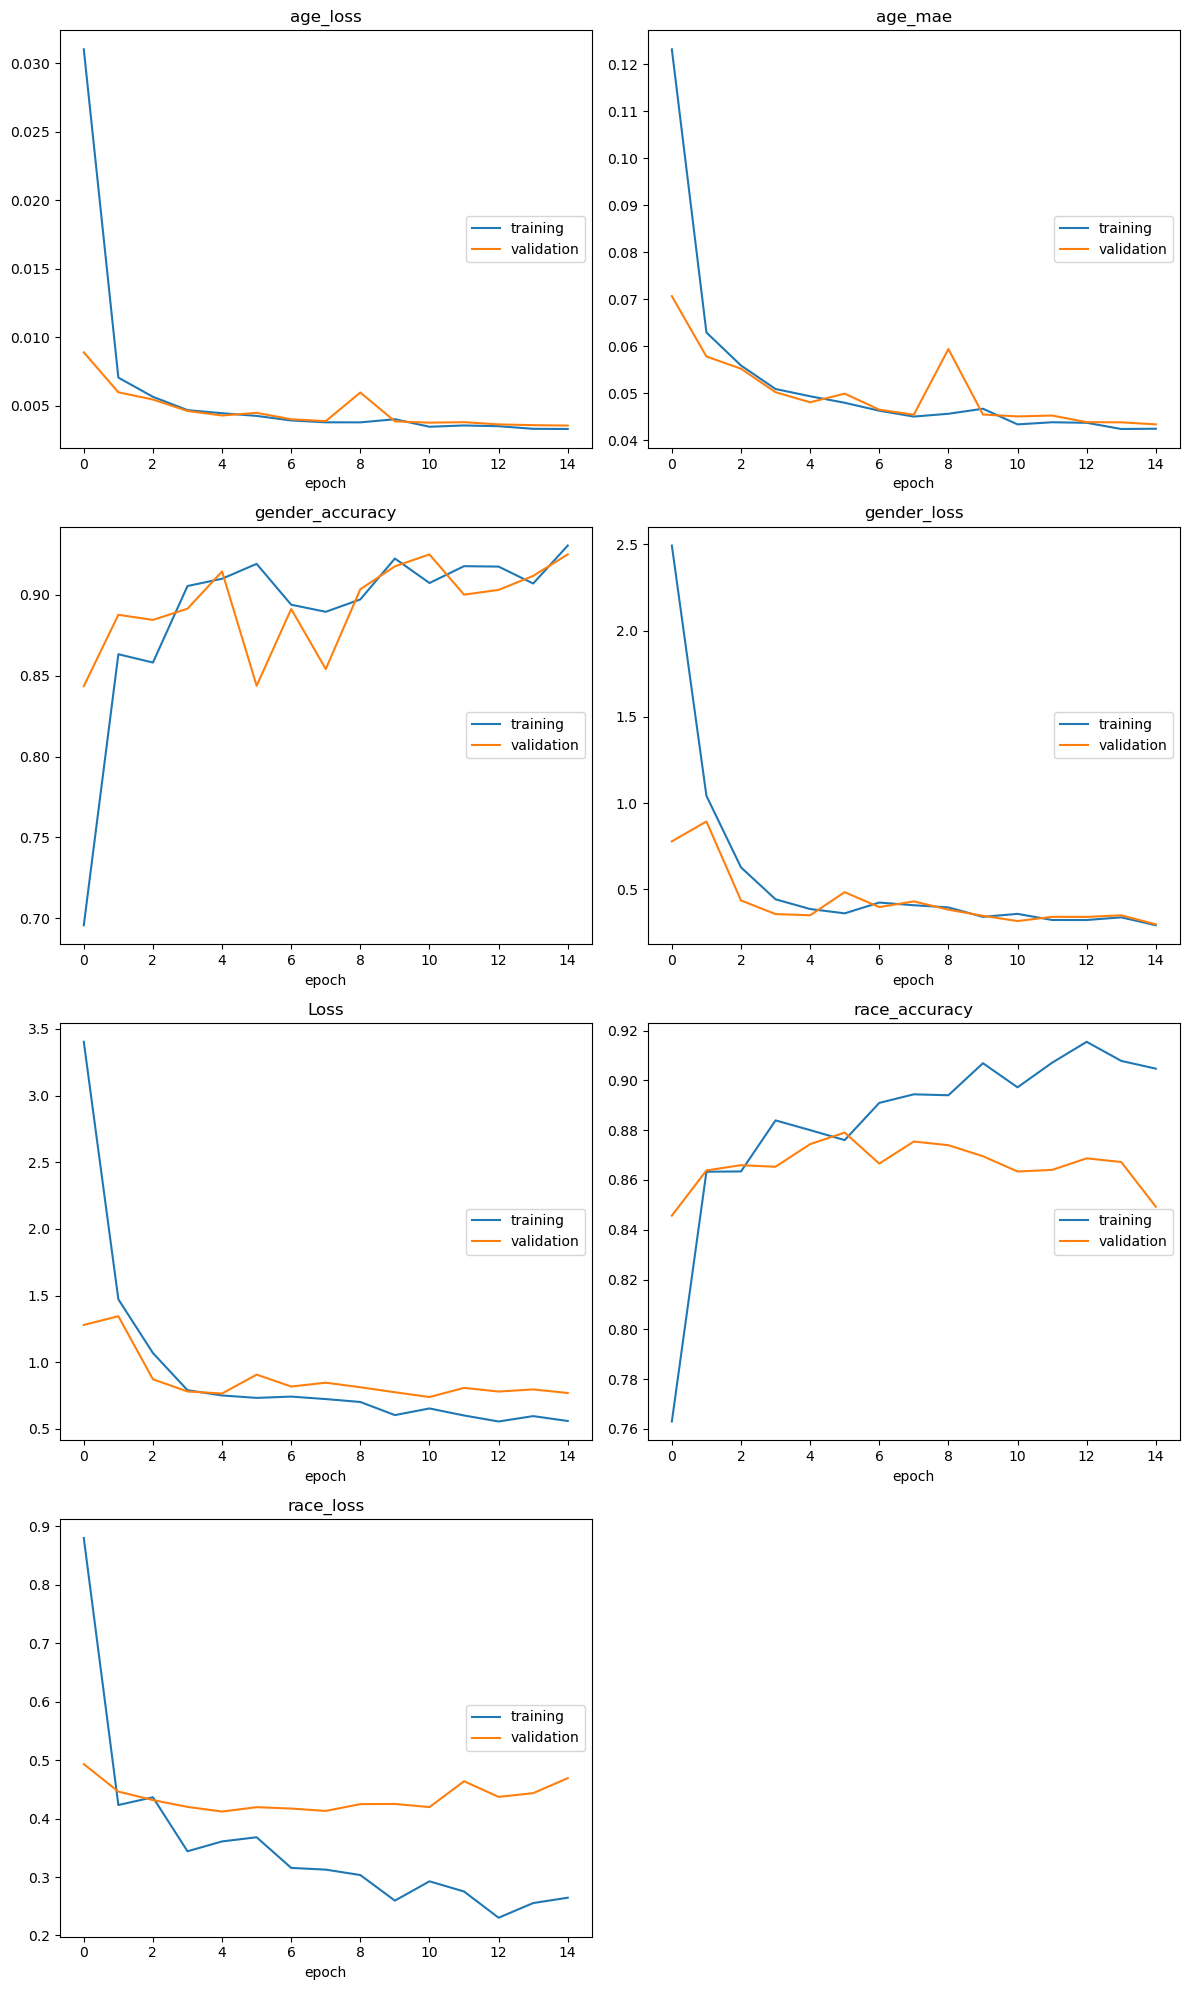

age_loss
	training         	 (min:    0.003, max:    0.031, cur:    0.003)
	validation       	 (min:    0.004, max:    0.009, cur:    0.004)
age_mae
	training         	 (min:    0.042, max:    0.123, cur:    0.042)
	validation       	 (min:    0.043, max:    0.071, cur:    0.043)
gender_accuracy
	training         	 (min:    0.696, max:    0.931, cur:    0.931)
	validation       	 (min:    0.844, max:    0.925, cur:    0.925)
gender_loss
	training         	 (min:    0.291, max:    2.493, cur:    0.291)
	validation       	 (min:    0.297, max:    0.893, cur:    0.297)
Loss
	training         	 (min:    0.556, max:    3.403, cur:    0.559)
	validation       	 (min:    0.739, max:    1.345, cur:    0.769)
race_accuracy
	training         	 (min:    0.763, max:    0.915, cur:    0.905)
	validation       	 (min:    0.846, max:    0.879, cur:    0.849)
race_loss
	training         	 (min:    0.230, max:    0.880, cur:    0.265)
	validation       	 (min:    0.412, max:    0.493, cur:    0.469)

E

In [131]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


model.compile(optimizer=optimizer, 
              loss={'gender': 'binary_crossentropy', 'race': 'sparse_categorical_crossentropy', 'age': 'mse'},
              metrics={'gender': 'accuracy', 'race': 'accuracy', 'age': 'mae'})

path = Path(cur + '//' + "model_multitask")
path.mkdir(exist_ok=True)
cpt_filename =  "checkpoint_best.h5"
cpt_path =str(path / cpt_filename)

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_age_mae', verbose=1, save_best_only=True, mode='min')

model.fit(split_outputs(train_generator), epochs=15, validation_data=split_outputs(val_generator),
                    callbacks=[PlotLossesCallback(), checkpoint], steps_per_epoch=50, 
                    validation_steps= len(df_val) // BATCH_SIZE)

In [132]:
model_multitask = load_model(cur + "//"+"model_multitask/checkpoint_best.h5")
val_generator = image_gen.flow_from_dataframe(
        dataframe=df_val,
        class_mode="raw",
        x_col="img_name", y_col=["gender", "race", "age"], 
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
results = model.evaluate(split_outputs(val_generator), steps=len(df_val)//BATCH_SIZE)
assert results[-3] > 0.90, f"Gender accuracy is too low. Please try to improve it {results[-3]}"
assert results[-2] > 0.80, f"Race accuracy is too low. Please try to improve it. {results[-2]}"
assert results[-1] < 0.09, f"Age MAE it too high: {results[-1]}"
print("Well done!")

Found 4759 validated image filenames.
37/37 [==============================] - 10s 269ms/step - loss: 0.7648 - gender_loss: 0.2966 - race_loss: 0.4646 - age_loss: 0.0036 - gender_accuracy: 0.9253 - race_accuracy: 0.8501 - age_mae: 0.0434
Well done!


4/4 [==============================] - 1s 107ms/step


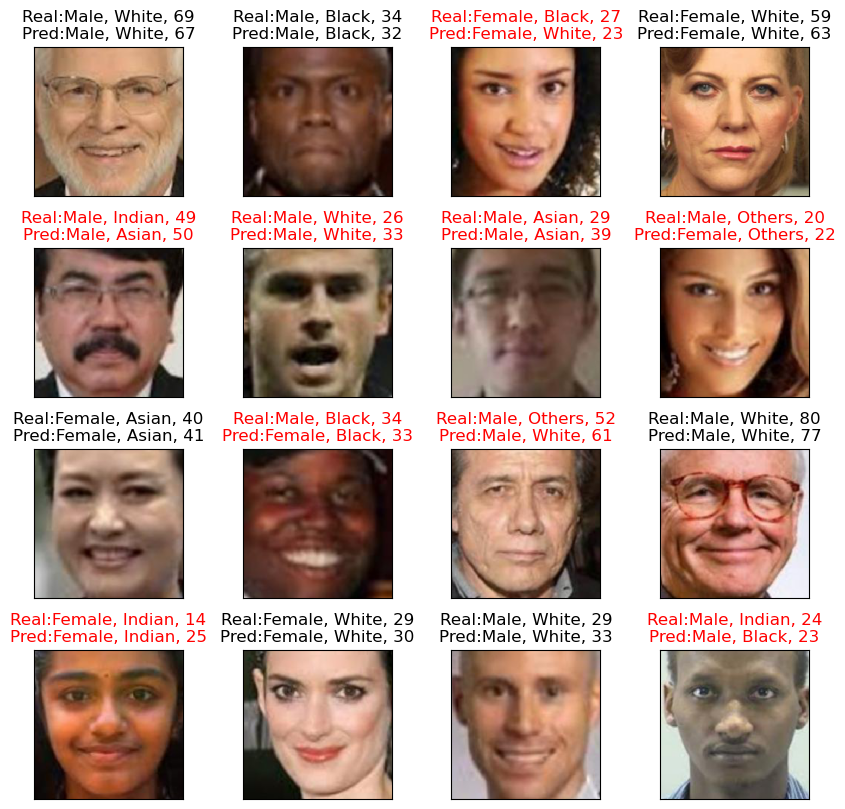

In [133]:
sample_validation_images, sample_validation_labels = next(split_outputs(val_generator))
predicted = model_multitask.predict(sample_validation_images)
show_faces(sample_validation_images, 
           real_gender=sample_validation_labels[0], predicted_gender=predicted[0],
           real_race=sample_validation_labels[1], predicted_race=predicted[1],
           real_age=sample_validation_labels[2].flatten(), predicted_age=predicted[2].flatten(),
           )

1/1 [==============================] - 0s 20ms/step


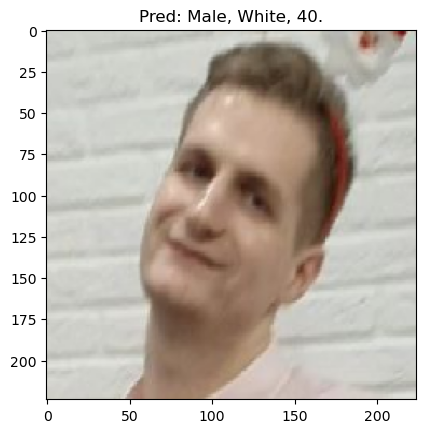

In [152]:
from keras_vggface.utils import preprocess_input
# url = 'https://drive.google.com/uc?id=1ZZgwwVxSjWG6gJT2uV2vt54QsLJcU07-'
# output = cur + '//' +'me.jpg'
# gdown.download(url, output, quiet=False)

img = image.load_img(r"C:\Users\vahahat\Desktop\Снимок2.PNG", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x, version=2) 
predicted_labels = model.predict(x)
plt.imshow(img)
gender, race, age = int(predicted_labels[0][0] > 0.5), np.argmax(predicted_labels[1][0]), predicted_labels[2][0]
title_obj = f"Pred: {gender_mapping[gender]}, {race_mapping[race]}, {int(age[0]*max_age)}."
_ = plt.title(title_obj)
# я получился немного моложе :)